In [2]:
import numpy as np
import os
import sys
currentdir = os.path.dirname(os.path.realpath('__file__'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from dataset import Dataset
from tools import distance,new_seed,execution_time
import matplotlib.pyplot as plt

In [14]:
dataset_name = 'test_2.csv'
dataset_path=f'{parentdir}/dataset/{dataset_name}'
x = Dataset(dataset_path)

In [23]:
# algorithm 1 K-Means++
class kpp:
    

    def __init__(
        self,
        dataset:Dataset
        )->None:

        
        self.dataset = dataset
        self.n=dataset.number_of_sample
        self.d=dataset.number_of_feature
        self.X=dataset.sample
        self.m = None
        self.K=None


    
    def fit(
        self,
        number_of_cluster:int ,
        sample_weight:np.ndarray=None
        )->np.ndarray:
        
        self.m=np.empty((0, self.d))
        self.K=number_of_cluster


            
        assert self.n>self.K and self.K >0 ,\
            'number of cluster should be in range [1,n)' 
            
        if sample_weight is not None:
            self.sample_weight=np.array(sample_weight)
        else:
            self.sample_weight=np.ones(self.n)
       
        self.sample_weight=self.sample_weight.reshape((-1,1)) 
        # line 1
        beta=self.sample_weight/np.sum(self.sample_weight)
        # line 2

        m=np.vstack((self.m,new_seed(self.X,1,beta)))
        # line 3
        alpha=np.array([np.inf]*self.n).reshape((-1,1))
        k=1
        # line 4
        while k <self.K:
            # line 5,6
            alpha=np.minimum(alpha,distance(self.X,m[k-1]))
            # line 7,8
            t=self.sample_weight*(alpha**2)
            beta=t/np.sum(t)
            # line 9
            k+=1
            # line 10
            m=np.vstack((m,new_seed(self.X,1,beta)))
        self.m=m
        # line 11
        return np.array(m)
    
    

In [4]:
t=kpp(x)


In [5]:
t.fit(-2)

AssertionError: number of cluster should be in range [1,n)

In [ ]:

m=np.empty((0,t.d))
m=np.vstack((m,new_seed(t.X,1,beta)))
m=np.vstack((m,new_seed(t.X,1,beta)))
m=np.vstack((m,new_seed(t.X,1,beta)))
m

array([[2., 0.],
       [2., 3.],
       [3., 3.]])

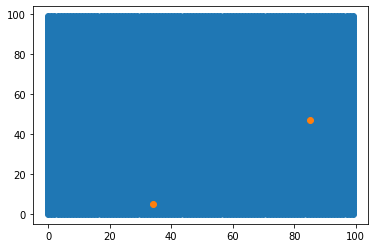

In [ ]:
t=kll()
c=t.fit(2)
plt.scatter(t.X[:,0],t.X[:,1])
plt.scatter(c[:,0],c[:,1])

In [ ]:
c=np.array([[0,0],[2,2]])

In [ ]:
j=np.array([[0,2],[0,4]])

In [ ]:
np.linalg.norm(c[:,None,:]-j,axis=2)  

array([[2.        , 4.        ],
       [2.        , 2.82842712]])

In [ ]:
j=np.empty(5)

In [19]:
@execution_time
def runner(iter:int,k:int):
    dis = []
    for i in range(iter):
        t.fit(k,5,k*2)
        dis.append(distance(t.c[0], t.c[1]))
    # plt.scatter(akpp.X[:, 0], akpp.X[:, 1])
    # plt.scatter(akpp.m[:, 0], akpp.m[:, 1])
    # plt.show()
    return np.mean(dis)

In [ ]:
beta=t.sample_weight/np.sum(t.sample_weight)
new_seed(x.sample,1,beta).shape

(1, 2)

In [22]:
t=kll(x)
# c=t.fit(2,5,4)
runner(10,2)

(23, 1)
2 (23, 2) (23, 1) (23, 1)
func:fit took: 7.534698247909546 sec
(18, 1)
2 (18, 2) (18, 1) (18, 1)
func:fit took: 5.924683094024658 sec
(22, 1)
2 (22, 2) (22, 1) (22, 1)
func:fit took: 7.827466726303101 sec
(29, 1)
2 (29, 2) (29, 1) (29, 1)
func:fit took: 9.445509195327759 sec
(25, 1)
2 (25, 2) (25, 1) (25, 1)
func:fit took: 7.908327579498291 sec
(15, 1)
2 (15, 2) (15, 1) (15, 1)
func:fit took: 4.685130596160889 sec
(19, 1)
2 (19, 2) (19, 1) (19, 1)
func:fit took: 5.8339457511901855 sec
(20, 1)
2 (20, 2) (20, 1) (20, 1)
func:fit took: 6.877811908721924 sec
(22, 1)
2 (22, 2) (22, 1) (22, 1)
func:fit took: 6.148748397827148 sec
(24, 1)
2 (24, 2) (24, 1) (24, 1)
func:fit took: 8.985345363616943 sec
func:runner took: 71.17266631126404 sec


66.0438172011608

In [ ]:
c=np.array([1,2,3])
j=np.array([4,1,6])

In [ ]:
c*j**2/np.sum(c*j**2)

array([0.12698413, 0.01587302, 0.85714286])

In [26]:
%%file kll.py
import numpy as np
from dataset import Dataset
from tools import distance, new_seed, execution_time


# algorithm 3 K-Means ||
class kll:
    def __init__(self, dataset: Dataset) -> None:
        self.dataset = dataset
        self.n = dataset.number_of_sample
        self.d = dataset.number_of_feature
        self.X = dataset.sample
        self.c = None
        self.K = None
        self.R = None
        self.l = None

    @execution_time
    def fit(
            self, number_of_cluster: int,
            rounds:int=5,
            oversampling_factor:int=1,
            sample_weight: np.ndarray = None) -> np.ndarray:

        self.c = np.empty((0, self.d))
        self.K = number_of_cluster
        self.R = rounds
        self.l = oversampling_factor

        assert self.R>0 and self.l>0 , \
            'invalid function parameter'
        assert self.n>self.K and self.K >0 ,\
            'number of cluster should be in range [1,n)' 

        if sample_weight is not None:
            self.sample_weight = np.array(sample_weight)
        else:
            self.sample_weight = np.ones(self.n)
       
        self.sample_weight = self.sample_weight.reshape((-1, 1))
        # line 1 algorithm 1
        beta = self.sample_weight/np.sum(self.sample_weight)
        # line 2 algorithm 1
        c = np.vstack((self.c, new_seed(self.X, 1, beta)))
        # line 3 algorithm 1
        alpha = np.array([np.inf]*self.n).reshape((-1, 1))
        k = 1
        kp = 0
        # line 4,5,6 algorithm 1
        for r in range(self.R):
            for i in range(self.n):
                for j in range(kp,k):
                    # line 7 algorithm 1
                    alpha[i] = np.minimum(
                        alpha[i], distance(self.X[i], c[j]))

            # line 8,9 algorithm 1
            kp = k
            t = self.sample_weight*(alpha**2)
            z = np.sum(t)
            # line 10,11,12 algorithm 3
            for i in range(self.n):
                p=(self.l*self.sample_weight[i]*(alpha[i]**2)/z)
                if p > np.random.rand(1)[0]:
                    k+=1
                    c=np.vstack((c, self.X[i]))
                    alpha[i]=0
       
        # line 13 algorithm 3
        wp=np.empty((0,1))
        for i in range(c.shape[0]):
            s=0
            for j in range(self.n):
                wj=self.sample_weight[j]
                indic= 1 if distance(self.X[j], c[i])==alpha[j] else 0
                s+=wj*indic
           
            wp=np.vstack((wp,s))
        self.c=c
        # line 14 algorithm 3
        kpp_=kpp(Dataset(np.array(c)))

        return kpp_.fit(self.K,wp)
            

# t=kll(x)
# c=t.fit(2,5,4)
# plt.scatter(t.X[:,0],t.X[:,1])
# plt.scatter(c[:,0],c[:,1])


Writing kll.py


In [ ]:
assert -1   , ' heeee'

In [ ]:
x.number_of_sample

25

In [ ]:
def encode(y):            
    return (np.arange(np.unique(y).size) == y)

In [ ]:
encode()

C:\Users\Mohammad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


False

In [ ]:
if 1==1 :

C:\Users\Mohammad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [ ]:
d= 1 if 3==5 else 0
d

0

In [ ]:
g=distance(x.sample[1], x.sample[5])

In [ ]:
1 if g>np.array([[1]]) else 0

1

In [ ]:
g

array([[1.41421356]])

In [10]:
y=np.array([[1,2],[3,4]])
# Dataset(y)
x=Dataset(y)

In [13]:
x.number_of_feature

2

In [66]:
f=np.empty((0,2))

In [63]:
f

array([], shape=(0, 20), dtype=float64)

In [67]:
f=np.vstack((f,np.array([1,2])))

In [68]:
f

array([[1., 2.]])